In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Cargar el conjunto de datos
data = pd.read_csv("/Users/walte/Documents/SEXTO SEMESTRE/ANALISIS DE DATOS/tarea 5/linda/Anexo 6 - Dataset Titanic/Titanic-Dataset.csv")

In [5]:
# Paso 1: Preparación del dataset
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)

C:\Users\walte\AppData\Local\Temp\ipykernel_6148\2297744227.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)
C:\Users\walte\AppData\Local\Temp\ipykernel_6148\2297744227.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

In [7]:
features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S']
X = data[features]
y = data['Survived']

In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [11]:
# Paso 2: Dividir el dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [13]:
# Paso 3: Entrenar el modelo de Regresión Logística
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [15]:
# Paso 4: Evaluar el modelo
y_pred = logreg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

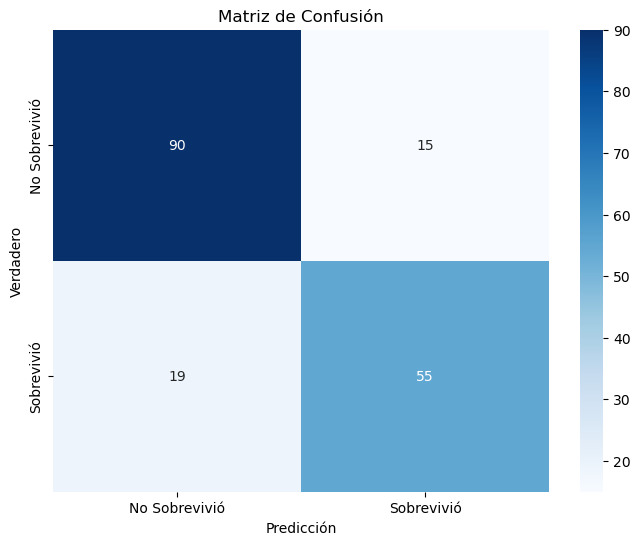

In [17]:
# Visualización de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Sobrevivió', 'Sobrevivió'], 
            yticklabels=['No Sobrevivió', 'Sobrevivió'])
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Verdadero')
plt.show()

In [19]:
print(f"Exactitud: {accuracy * 100:.2f}%")
print("Reporte de Clasificación:\n", classification_rep)

Exactitud: 81.01%
Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



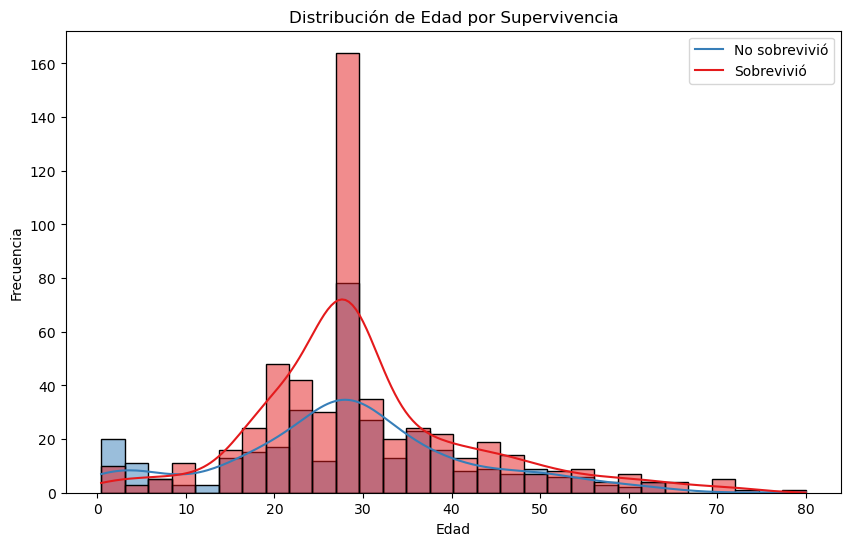

C:\Users\walte\AppData\Local\Temp\ipykernel_6148\1382733575.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='Sex_male', y='Survived', palette='coolwarm')


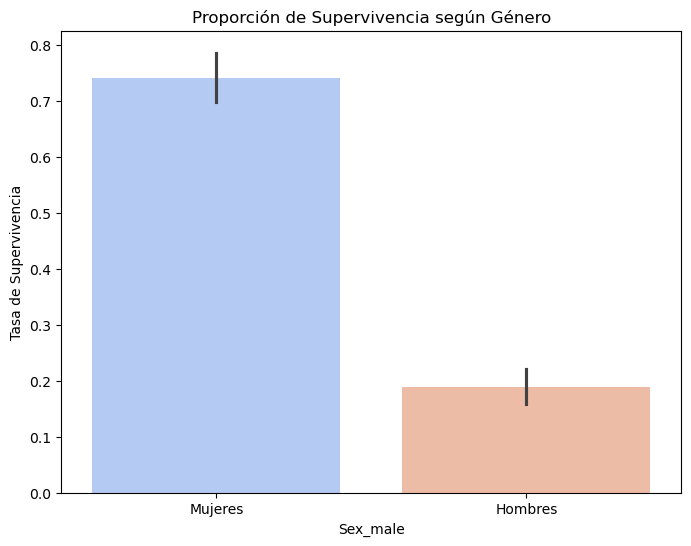

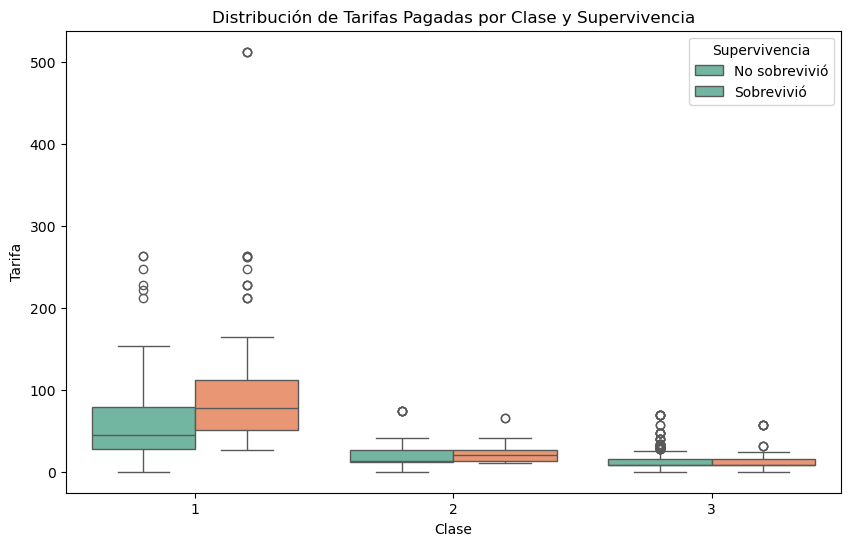

In [21]:
# Gráficos adicionales para análisis exploratorio y resultados

# Gráfico 1: Distribución de la edad por supervivencia
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Age', hue='Survived', kde=True, bins=30, palette='Set1')
plt.title('Distribución de Edad por Supervivencia')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.legend(['No sobrevivió', 'Sobrevivió'])
plt.show()

# Gráfico 2: Proporción de supervivencia según el género
plt.figure(figsize=(8, 6))
sns.barplot(data=data, x='Sex_male', y='Survived', palette='coolwarm')
plt.title('Proporción de Supervivencia según Género')
plt.xticks([0, 1], ['Mujeres', 'Hombres'])
plt.ylabel('Tasa de Supervivencia')
plt.show()

# Gráfico 3: Distribución de tarifas pagadas por clase y supervivencia
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Pclass', y='Fare', hue='Survived', palette='Set2')
plt.title('Distribución de Tarifas Pagadas por Clase y Supervivencia')
plt.xlabel('Clase')
plt.ylabel('Tarifa')
plt.legend(title='Supervivencia', labels=['No sobrevivió', 'Sobrevivió'])
plt.show()